In [30]:
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

stats_8 = pd.read_csv('../results/run_8_map_real_maze/stats.csv')
stats_16 = pd.read_csv('../results/run_16_map_real_maze/stats.csv')
stats_32 = pd.read_csv('../results/run_32_map_real_maze/stats.csv')

with open('../results/run_8_map_real_maze/fitnesses.json') as f:
    fitnesses_8 = json.load(f)


with open('../results/run_16_map_real_maze/fitnesses.json') as f:
    fitnesses_16 = json.load(f)


with open('../results/run_32_map_real_maze/fitnesses.json') as f:
    fitnesses_32 = json.load(f)


# convert fitnesses to np arrays
fitnesses_8 = np.array(fitnesses_8)
fitnesses_16 = np.array(fitnesses_16)
fitnesses_32 = np.array(fitnesses_32)
    
fitnesses_16.shape

(50, 1000)

In [9]:
# count nans for stats_8
nans_8 = stats_8['first_winner'].isna().sum()
nans_16 = stats_16['first_winner'].isna().sum()
nans_32 = stats_32['first_winner'].isna().sum()

# compute win rate as 1 - nans / total
win_rate_8 = 1 - nans_8 / len(stats_8)
win_rate_16 = 1 - nans_16 / len(stats_16)
win_rate_32 = 1 - nans_32 / len(stats_32)

print('win rate 8: ', win_rate_8)
print('win rate 16: ', win_rate_16)
print('win rate 32: ', win_rate_32)

win rate 8:  0.86
win rate 16:  0.94
win rate 32:  1.0


In [12]:
stats_8.head()

,best_fitness,generation,wrong_actions,loops,dead_ends,distance,first_winner
0,-7,672,134,102,0,0,672.0
1,-5,518,118,72,0,0,387.0
2,-5,174,118,83,0,0,41.0
3,-17,67,135,97,3,10,NaN
4,-5,595,117,78,8,0,205.0


<Axes: xlabel='first_winner', ylabel='Count'>

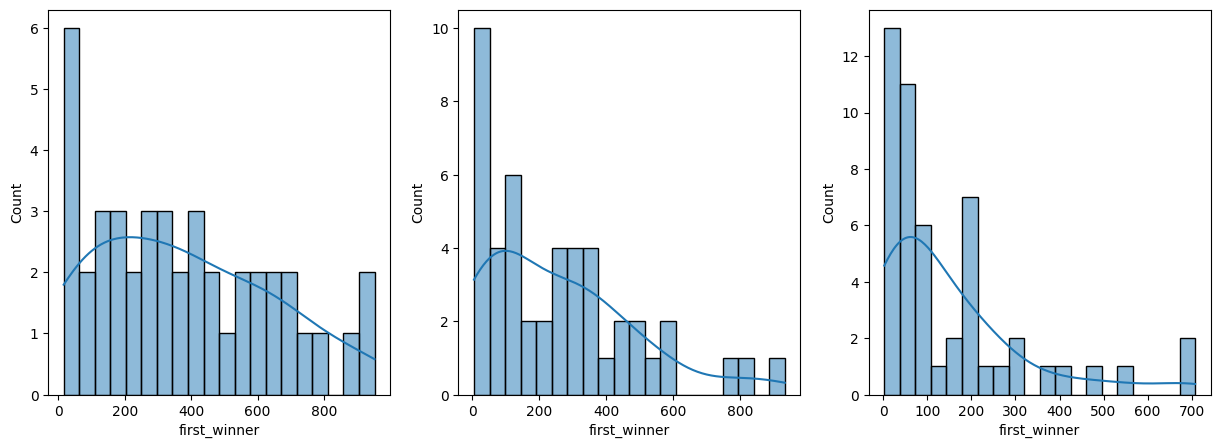

In [16]:
fix, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=stats_8['first_winner'], ax=axs[0], kde=True, bins=20)
sns.histplot(data=stats_16['first_winner'], ax=axs[1], kde=True, bins=20)
sns.histplot(data=stats_32['first_winner'], ax=axs[2], kde=True, bins=20)

<Axes: xlabel='best_fitness', ylabel='Count'>

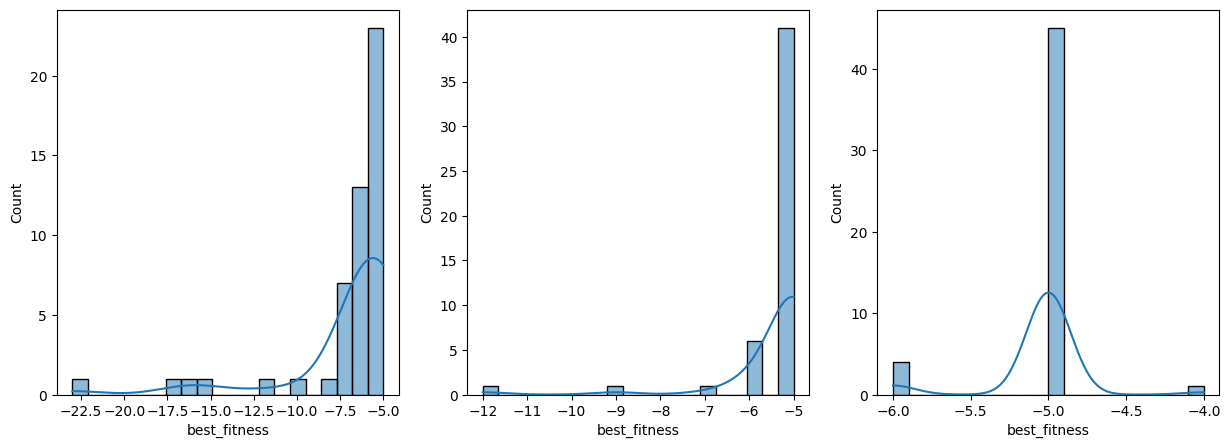

In [17]:
# do the same for best_fitness
fix, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=stats_8['best_fitness'], ax=axs[0], kde=True, bins=20)
sns.histplot(data=stats_16['best_fitness'], ax=axs[1], kde=True, bins=20)
sns.histplot(data=stats_32['best_fitness'], ax=axs[2], kde=True, bins=20)

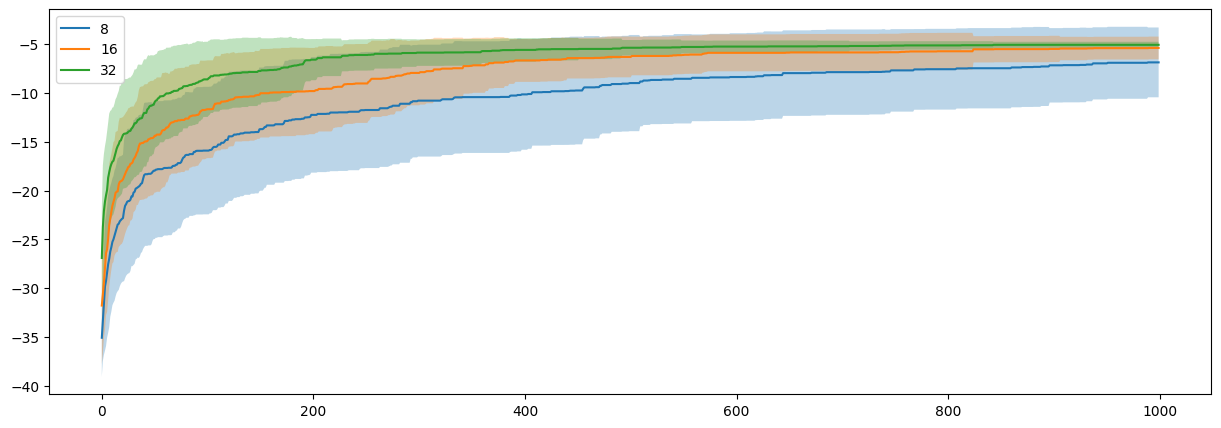

In [32]:
# from fitnesses array make a lineplot which is the mean of the 50 experiments and the std is the area around the mean
# compute mean and std
mean_8 = np.mean(fitnesses_8, axis=0)
mean_16 = np.mean(fitnesses_16, axis=0)
mean_32 = np.mean(fitnesses_32, axis=0)

std_8 = np.std(fitnesses_8, axis=0)
std_16 = np.std(fitnesses_16, axis=0)
std_32 = np.std(fitnesses_32, axis=0)

# plot
plt.figure(figsize=(15, 5))
plt.plot(mean_8, label='8')
plt.fill_between(range(len(mean_8)), mean_8-std_8, mean_8+std_8, alpha=0.3)
plt.plot(mean_16, label='16')
plt.fill_between(range(len(mean_16)), mean_16-std_16, mean_16+std_16, alpha=0.3)
plt.plot(mean_32, label='32')
plt.fill_between(range(len(mean_32)), mean_32-std_32, mean_32+std_32, alpha=0.3)
